In [2]:
import numpy as np
import pandas as pd
import json
import re

In [3]:
resData = pd.read_csv('./Datasets/Cleaned Grab SG Restaurants.csv')
resData.head()

,name,address,cuisine,delivery_cost,lat,lon,opening_hours,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,total opening time hours
0,Texas Chicken,Texas Chicken - VivoCity,"[""Western"", ""Fast Food"", ""Halal"", ""Chicken"", ""...",570.0,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,3.8,1591.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,75.75
1,Subway,Subway - Vivocity,"[""Healthy"", ""Sandwiches"", ""Fast Food"", ""Halal""...",570.0,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,4.2,197.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,49.00
2,LiHO Tea,LiHO Tea - Vivo City,"[""Same Prices In-Store"", ""Beverages"", ""Local"",...",560.0,1.264309,103.821369,"{""open"": true, ""displayedHours"": ""11:30-20:45""...",5000,4.5,353.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,41.0,64.75
3,Wingstop,Wingstop - VivoCity,"[""Halal"", ""Chicken"", ""Fast Food"", ""Burger"", ""W...",560.0,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",5000,4.4,1391.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,45.0,70.00
4,Le Shrimp Ramen,Le Shrimp Ramen - Vivocity,"[""Japanese"", ""Ramen"", ""Noodles"", ""Asian""]",570.0,1.264810,103.822554,"{""open"": true, ""displayedHours"": ""10:30-21:00""...",5000,4.6,309.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,44.0,73.50


# Correalation between Promocode and ratings

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score

# Load the dataset (replace './Datasets/Cleaned Grab SG Restaurants.csv' with the correct file path)
resData = pd.read_csv('./Datasets/Cleaned Grab SG Restaurants.csv')

# Extract 'promo' and 'rating' columns
data = resData[['promo', 'rating']].copy()

# Drop rows with missing values in the 'rating' column
data.dropna(subset=['rating'], inplace=True)

# Encode 'promo' column: 1 if promo code exists, 0 otherwise
data['promo'] = data['promo'].apply(lambda x: 1 if pd.notna(x) else 0)

# Prepare data for modeling
X = data[['promo']]
y = data['rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Explained Variance Score:", explained_variance)

# Coefficients of the linear regression model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients:")
print(coefficients)


Mean Squared Error: 0.3599554737687415
Explained Variance Score: 0.004058994999307619

Coefficients:
  Feature  Coefficient
0   promo     0.067092


Since the Mean Square Error is high and the Explained Variance Score is very low. Hence, column promo and rating might not be correlation to each other.

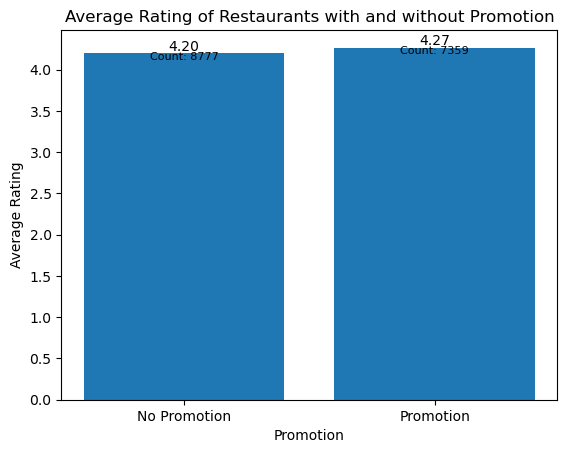

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_promotion_comparison(data):
    # Create a binary column indicating whether any promotion is present or not
    data['has_promotion'] = data['promo'].apply(lambda x: 1 if pd.notna(x) else 0)

    # Group restaurants by whether they have a promotion or not and calculate the mean ratings
    ratings_comparison = data.groupby('has_promotion')['rating'].mean()
    restaurant_counts = data['has_promotion'].value_counts()

    # Plot the comparison
    plt.bar(['No Promotion', 'Promotion'], ratings_comparison)
    plt.xlabel('Promotion')
    plt.ylabel('Average Rating')
    plt.title('Average Rating of Restaurants with and without Promotion')

    # Add text for ratings and number of restaurants on top of each bar
    for i, (rating, count) in enumerate(zip(ratings_comparison, restaurant_counts)):
        plt.text(i, rating, f'{rating:.2f}', ha='center', va='bottom')
        plt.text(i, rating - 0.1, f'Count: {count}', ha='center', va='bottom', fontsize=8)

    plt.show()

# Call the function with the DataFrame containing restaurant data
plot_promotion_comparison(resData)



In [6]:
import pandas as pd
import statsmodels.api as sm

def calculate_goodness_of_fit(data, threshold):
    # Create a binary column indicating whether any promotion is present or not
    data['has_promotion'] = data['promo'].apply(lambda x: 1 if pd.notna(x) else 0)

    # Convert ratings to binary outcome based on threshold
    data['above_threshold'] = (data['rating'] >= threshold).astype(int)

    # Fit logistic regression model
    X = sm.add_constant(data['has_promotion'])
    y = data['above_threshold']
    model = sm.Logit(y, X)
    result = model.fit()

    # Print summary of the logistic regression model
    print(result.summary())

# Assuming your data is stored in a DataFrame named 'resData'
threshold = 4  # You can adjust this threshold as needed
calculate_goodness_of_fit(resData, threshold)


Optimization terminated successfully.
         Current function value: 0.574884
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        above_threshold   No. Observations:                16136
Model:                          Logit   Df Residuals:                    16134
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Apr 2024   Pseudo R-squ.:                 0.05146
Time:                        13:26:45   Log-Likelihood:                -9276.3
converged:                       True   LL-Null:                       -9779.6
Covariance Type:            nonrobust   LLR p-value:                6.678e-221
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3293      0.024     13.937      0.000       0.283       0.376
has_promotion     1.

In [16]:
def calculate_mse_r2(data):
    # Make a copy of the data to avoid the SettingWithCopyWarning
    data_copy = data.copy()

    # Drop rows where 'rating' is NaN
    data_copy.dropna(subset=['rating'], inplace=True)
    
    # Create a binary column indicating whether any promotion is present or not
    data_copy['has_promotion'] = data_copy['promo'].apply(lambda x: 1 if pd.notna(x) and x != '' else 0)
    
    # Selecting the features and target variable
    X = data_copy[['has_promotion']]
    y = data_copy['rating']
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Creating a linear regression model
    model = LinearRegression()
    
    # Training the model with the training data
    model.fit(X_train, y_train)
    
    # Predicting the ratings with the test data
    y_pred = model.predict(X_test)
    
    # Calculating the MSE and R^2 values
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2


In [17]:
# Call the function and print the MSE and R^2 values
mse, r2 = calculate_mse_r2(resData)
mse, r2

(0.3693537327043631, -0.0010609193493695823)

The statistical analysis using **Mean Squared Error (MSE)** and the **Coefficient of Determination (R²)** suggests that 'promo' is not a reliable predictor for restaurant ratings. With an MSE of approximately **0.369**, the model's predictions are on average 0.369 rating points away from the actual ratings, indicating a moderate level of prediction error. More critically, the R² value is approximately **-0.001**, indicating that the model with 'promo' as a predictor performs worse than a simple model that only uses the mean rating for predictions. The negative R² implies that 'promo' does not capture any variance in the ratings and may introduce noise. Thus, 'promo' should not be used as a predictor for restaurant ratings.
